# Neural Network
## 개요
Neural Network 는 인간의 신경인 뉴런을 모방한 모델이라고는 하는데 이는 과장된 이야기일 수 있다.

일반적으론 하나의 함수를 층(Layer)으로 보며 여러 층을 가지는 모델을 NN 이라 한다.

기존 모델들이 가지는 한계를 극복하기 위한 모델이다.

## 예시
요소 $X_1, ..., X_n$, 레이블 $y$에 대해 $W = [w_1, ..., w_n], X = [X_1, ..., X_n]$일 때 일반적인 Linear Regression 은 다음과 같다.

$$ XW^T = y $$

그러나 위와 같은 선형회귀는 다음과 같은 XOR 문제를 해결 하지 못한다. 만약 억지로 회귀를 시킨다면 $y = 0.5 + 0 * x1 + 0 * x2$ 와 같은 식이 나올 것이다. 이러한 문제가 재기되고 나서 80년대 인공지능의 암흑기를 불러왔다.

|X_1|X_2|y|
|---|---|---|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

그러나 데이터가 다음과 같다고 하면, 아래와 같이 두 개의 선형회귀 층을 통해 훨씬 오차가 적은 모델을 만들 수 있다.

|X_1|X_2|s_1|s_2|y|
|---|---|---|---|---|
|0|0|1|0|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|0|1|0|

$$ s_1 = 1.25 - 0.5*x_1 - 0.5*x_2 $$
$$ s_2 = 0.25 + 0.5*x_1 + 0.5*x_2 $$
$$ y = -1 + 1*s_1 + 1*s_2 $$

이렇게 원래 입력값 $x_1$, $x_2$에 대한 층을 input layer, 새로운 변수 $s_1$, $s_2$에 대한 층을 hidden layer 라 부른다. 이러한 알고리즘을 퍼셉트론이라고도 한다.

즉, 주어진 값으로만 예측하는 것이 아닌, 새로운 변수를 선형회귀모델(혹은 다른 모델)을 통해 생성하고 생성된 새로운 변수를 통해 예측을 하는 방식이다. 이러한 시행을 반복하면 층이 쌓이는 것과 같아져 깊다는 의미의 Deep Learning 이 되는 것이다.

위와 같은 모델을 그래프로 나타내면 [여기](https://velog.io/@dscwinterstudy/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0-%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-2%EC%9E%A5-wgk5jxneq5)와 같다.

함수로 표현하면 다음과 같다.

$$ S = XW^T $$
$$ y = SH^T $$
$$ X = [x1, x2], S = [s1, s2] $$
$$ W = \begin{bmatrix}w_{11} & w_{12} \\ w_{21} & w_{22}\end{bmatrix} $$
$$ H = [h1, h2] $$

Loss Function 이 $J$라 하자. 그렇다면 최종적으로 최적화 해야할 값 $L$은 다음과 같다.

$$ L = J(y; W, H) = J(XW^TH^T) $$

$W, X, H$는 선형 결합이므로 $J$가 $W, H$ 에 대해 미분 가능하다면, 온전히 Gradient Descent 방법을 통해 최적의 $W, H$를 찾을 수 있다. 선형회귀모델이 아니어도, 혹은 층이 더 깊어져도 미분 가능한 모델을 쓰기만 하면 최적화가 가능하다.

## Activation Function
문제가 복잡해져 여러 층을 사용하는 딥러닝 모델을 생각 해 보자. 기본적으로 각 층은 곱 연산이기 때문에 무작정 층을 늘릴 경우 값이 비정상적으로 높아지거나 혹은 비정상적으로 작아질 수 있다. 또 한 값이 너무 작거나 음수인 경우 낮은 가중치가 부여 된다는 의미이므로 예측에 큰 영향을 주지 않게 하고 싶을 수 도 있을 것이다. 그러나 데이터들이 가지고 있는 고유한 특성은 사라져서는 안된다. 이러한 문제를 해결하기 위해 특별한 함수들을 쓰며 이를 Activation Function(활성 함수)라 하고, 이러한 함수를 각 층에 대입한다. 다음은 몇가지 예다.

- $ Sigmoid: \sigma (x) = \frac{1}{1+e^{-x}} $ - 값을 (0, 1) 로 축소한다.
- $ ReLU: max(0, x) $ - 음수 값을 0으로 만든다.
- $ LeakyReLU: max(0.1x, x) $ - 음수 값의 크기를 줄여 영향력을 줄인다.
- $ tanh $ - 값을 (-1, 1) 로 축소한다.

이러한 함수들은 모델의 성능을 높일 뿐 아니라 값의 범위를 제한 시켜 오버플로우/언더플로우도 방지하며 값을 단순화 시켜 연산 속도도 줄인다. 게다가 각 함수는 미분가능(ReLU 류 함수들은 미분 불가능한 점이 단 하나이며 이 점에서는 그냥 우미분계수인 1을 쓰는 것으로 보인다.)하므로 이 함수들을 도입해도 여전히 수치해석적으로 최적화가 가능하다.

## Softmax with Cross Entropy Loss
Classification 문제의 경우 두가지로 분류하는 이진 분류, 3가지 이상 클래스로 분류하는 다중 클래스 분류 문제가 있다.

로지스틱 회귀에서 볼 수 있듯이, 이진 분류의 경우 (0, 1)의 값을 반환하면 되지만, 다중 클래스 분류 문제의 경우에는 각 클래스에 대한 확률을 반환해야 한다.

따라서 다음 식을 이용하여 각 확률을 반환 하게끔 하고 이를 Softmax 라 한다.

$$ p_i = \frac{e^{y_i}}{\sum_{j=1}^c e^{y_j}} $$

위 식을 이용하면 $y$ 가 어떤 값을 가져도 각 $p_i$가 (0, 1)의 값을 가진다. 또 한 미분 가능한 함수이므로 최적화 가능하다.

Softmax 함수는 일반적으로 Cross Entropy Loss 라는 Loss Function과 같이 쓴다. 이는 다음과 같다.

$$ L = -\frac{1}{n} \sum_{i=1}^n \sum_{j=1}^c \mathbb{1}(y_i = j) \log{p_j} $$

예를 들어, 4로 분류된 데이터에 대해서 모델 A가 $ [0.1, 0.17, 0.03, 0.5, 0.2] $의 확률을 반환했다 하면, 이 데이터에 대한 Cross Entropy Loss는 $ -\log{0.5} $ 가 된다. 반면 모델 B가 $ [0.12, 0.09, 0.01, 0.7, 0.08] $을 반환 했다면 Loss 는 $ -\log{0.7} $ 이 된다. 두 모델 다 4로 분류될 확률을 가장 높게 예측 했지만, 모델 B가 정답에 대한 확률을 더 높게 예측했기 때문에 더 낮은 Loss 를 가진다. 이렇게 Corss Entropy Loss 는 단순히 정답을 맞췄는지만 따지는 것이 아니라 그에 대한 확률까지 감안할 수 있다.

Softmax 와 Cross Entropy Loss 를 같이 사용하면 도함수가 간단하게 나온다는 장점이 있다. 즉,

$$ H = Layers(X) $$
$$ P = Softmax(H) $$
$$ L = CrossEntropy(P) $$

라 하면, $ \frac{\partial L}{\partial H} $ 의 꼴이 간단하게 나온다. $ \frac{\partial L}{\partial H} $ 을 구한다면 $Layers$는 미분 가능 함수들의 합성이므로, 최종적으로 $\frac{\partial L}{\partial \theta}$를 구할 수 있는 것이다.

다음 풀이를 보면 알 수 있다.

먼저 Softmax 함수 $ p_i = \frac{e^{h_i}}{\sum_{j=1}^c e^{h_j}} $를 $H$ 에 대해 미분해 보자.

$ \frac{\partial p_i}{\partial H} = [\frac{\partial p_i}{\partial h_1}, ..., \frac{\partial p_i}{\partial h_c}] $ 이므로 각 $\frac{\partial p_i}{\partial h_j} $ 를 $j$ 의 경우에 따라 나눠서 구해보자.

1. $ i=j $
$$ \frac{\partial p_i}{\partial h_i} = \frac{e^{h_i} \sum_{j=1}^c e^{h_j} - e^{h_i} e^{h_i}}{(\sum_{j=1}^c e^{h_j})^2}
= \frac{e^{h_i}}{\sum_{j=1}^c e^{h_j}} (\frac{\sum_{j=1}^c e^{h_j} - e^{h_i}}{\sum_{j=1}^c e^{h_j}}) = p_i(1 - p_i) $$

2. $i \neq j $
$$ \frac{\partial p_i}{\partial h_j} = \frac{0 * \sum_{j=1}^c e^{h_j} - e^{h_i} e^{h_j}}{(\sum_{j=1}^c e^{h_j})^2}
= -p_i p_j$$

마지막으로 $ \frac{\partial L}{\partial H} $를 구하기 위해 Cross Entropy 함수 $ L = - \sum_{j=1}^c \mathbb{1}(y = j) \log{p_j} $를 $H$에 대해 미분해보자.

$$ \frac{\partial L}{\partial h_i} = - \sum_{j=1}^c \mathbb{1}(y = j) \frac{1}{p_j} \frac{\partial p_j}{\partial h_i}
\\ = - \mathbb{1}(y = i) (1 - p_i) + \sum_{j \neq i} \mathbb{1}(y = j) p_i 
\\ = -\mathbb{1}(y = i) + (\mathbb{1}(y = i) p_i + \sum_{j \neq i} \mathbb{1}(y = j) p_i)
\\ = \sum \mathbb{1}(y = j) p_i - \mathbb{1}(y = i)
\\ = p_i \sum \mathbb{1}(y = j) - \mathbb{1}(y = i)
\\ = p_i - \mathbb{1}(y = i) $$

즉, Softmax 확률에서 정답 레이블에 해당하는 인덱스에 대해서 1만 빼주면 된다.

## Mini-batch
딥러닝 모델을 학습시킬 때 일반적으로 매우 많은 데이터를 이용한다. 그러나 딥러닝 모델은 많은 층으로 이루어져 있는 만큼 데이터가 많을 경우 연산량이 폭발적으로 증가한다. 따라서 한꺼번에 모든 데이터를 입력하여 학습 시킬 경우 Gradient Descent 알고리즘을 한 번 돌릴 때 마다 매우 많은 시간이 걸릴 것이다. 이를 해결하기 위해 학습 데이터를 여러개를 나누어 모델에 입력한다. 이 때 나누어진 각 데이터를 Mini-batch 라고 한다.

## 실습: MNIST 데이터 (손글씨로 0~9 숫자 쓴 데이터)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
mnist = fetch_openml('mnist_784')
data = mnist.data
target = mnist.target

data.shape

(70000, 784)

In [ ]:
target.head()

AttributeError: ignored

In [ ]:
X = np.array(data)
y = np.array(list(map(lambda x: int(x),target.tolist())))

X.shape

784

# 새 섹션

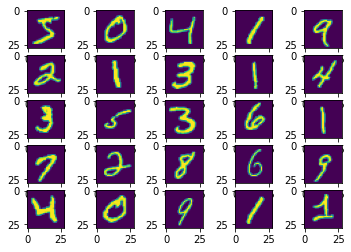

In [ ]:
fig, ax = plt.subplots(5, 5)

for i, ax in enumerate(ax.flat):
    ax.imshow(X[i].reshape(28, 28))

In [ ]:
class TwoLayerNN:
    def __init__(self, input_size, hidden_size, target_size, std=1e-4):
        self.input_size = input_size
        self.target_size = target_size
        self.params = {}
        self.params["W1"] = std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = std * np.random.randn(hidden_size, target_size)
        self.params["b2"] = np.zeros(target_size)
        
    def forward(self, X, y=None):
        # Linear - ReLU - Linear - Softmax - CrossEntropy Loss 이용
        
        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        N, D = X.shape

        a = X.dot(W1) + b1 # Linear
        a[a < 0] = 0 # ReLU
        H = a.dot(W2) + b2 # Linear
        e = np.exp(H)
        p = e / np.sum(e, axis=1, keepdims=True) # Softmax
        
        if y is None:
            return p, a

        one = np.zeros((N, self.target_size))
        one[np.arange(N), y] = 1 # One-Hot Encoding
        L = np.sum(one * np.log(p), axis=1)
        Loss = -np.mean(L) # Cross Entropy Loss

        return Loss
    
    def backward(self, X, y, lr=1e-4):
        N = X.shape[0]
        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        p, a = self.forward(X) # p: (N, C) one: (N, C) a: (N, H)
        one = np.zeros((N, self.target_size))
        one[np.arange(N), y] = 1 # One-Hot Encoding
        
        dh = p - one # dL/dH: (N, C)
        dw2 = (a.T).dot(dh) / N # dL / dw2: (H, C)
        db2 = np.ones(N).dot(dh) / N # dL / db2: (1, C)
        da = dh.dot(W2.T) * (a != 0) # dL/da: (N, H)
        dw1 = (X.T).dot(da) / N
        db1 = np.ones(N).dot(da) / N
        
        self.params["W1"] -= lr * dw1
        self.params["b1"] -= lr * db1
        self.params["W2"] -= lr * dw2
        self.params["b2"] -= lr * db2
        
    def acc_score(self, X, y):
        p, _ = self.forward(X)
        y_pred = np.argmax(p, axis=1)
        return np.sum(y==y_pred) / X.shape[0]
    
    def predict(self, X):
        p, _ = self.forward(X)
        return np.argmax(p, axis=1)
    
    def get_batch(self, X, y, i, batch_size):
        n = i * batch_size
        m = min(X.shape[0], n + batch_size)
        return X[n:m, :], y[n:m]

In [ ]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.3)

X_tr.shape

(49000, 784)

In [ ]:
from tqdm import tqdm
nn = TwoLayerNN(X.shape[1], 50, 10)
batch_size = 128
batch_num = X_tr.shape[0] // batch_size
loss = []
score = []

for itr in range(5):
    for b in tqdm(range(batch_num)):
        X_b, y_b = nn.get_batch(X_tr, y_tr, b, batch_size)

        if b % 10:
            cur_loss = nn.forward(X_b, y_b)
            cur_score = nn.acc_score(X_tst, y_tst)
            loss.append(cur_loss)
            score.append(cur_score)
        
        nn.backward(X_b, y_b)

100%|████████████████████████████████████████████████████████████████████████████████| 382/382 [00:32<00:00, 11.93it/s]


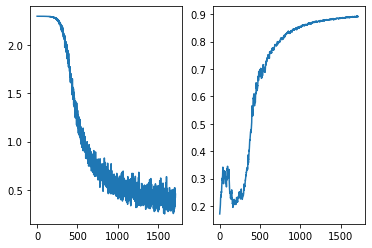

In [ ]:
fig, ax = plt.subplots(1, 2)
graph = [loss, score]

for g, ax in zip(graph, ax):
    ax.plot(g)

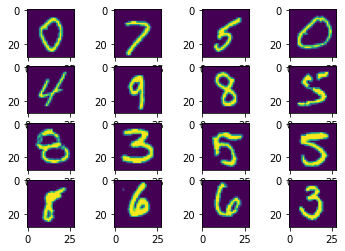

In [ ]:
fig, ax = plt.subplots(4, 4)
num = np.random.choice(X_tst.shape[0], 16, replace=False)

for i, ax in zip(num, ax.flat):
    ax.imshow(X_tst[i].reshape(28, 28))

In [ ]:
nn.predict(X_tst[num, :])

array([0, 7, 5, 0, 4, 9, 3, 5, 8, 3, 5, 5, 8, 6, 6, 3], dtype=int64)

In [ ]:
nn.acc_score(X_tst, y_tst)

0.8915714285714286